In [18]:
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.env_checker import check_env
from trajectoryenv import TrajectoryEnv
from wandb.integration.sb3 import WandbCallback
import gymnasium
import wandb
import numpy as np
import pickle
import sys

In [2]:
wandb.init(
    # set the wandb project where this run will be logged
    project="rl",
    sync_tensorboard=True,
    config={
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pmazumder3927 (pmazumder3927-self). Use `wandb login --relogin` to force relogin


In [2]:
from stable_baselines3 import PPO
import multiprocessing
from stable_baselines3.common.vec_env import SubprocVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env

# Function to create instances of your custom environment
def make_env(env_id, rank, seed=0):
    def _init():
        env = TrajectoryEnv(future_trajectory_length=49)
        env.seed(seed + rank)
        return env
    return _init
multiprocessing.set_start_method('spawn')
# Number of parallel environments
n_envs = 8  # Adjust based on your available CPU cores

# Create the vectorized environment using SubprocVecEnv
vec_env = SubprocVecEnv([make_env(i, i) for i in range(n_envs)])

# Optional: Normalize observations and rewards
vec_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.)

# Create and train the PPO model
model = PPO('MlpPolicy', vec_env, verbose=1, tensorboard_log="./ppo_tensorboard/")

# Train the model
model.learn(total_timesteps=1000000)

# Save the trained model
model.save("ppo_trajectory")

# To load and continue training later
# model = PPO.load("ppo_trajectory", env=vec_env)

# Testing the trained model
obs = vec_env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, rewards, dones, infos = vec_env.step(action)
    vec_env.render()  # If rendering is set up in your environment

In [50]:
model = PPO.load("./models/ppo_model_1600000_steps.zip")


In [51]:
env = TrajectoryEnv()


In [85]:
env.reset()


(array([[0.78685343, 0.6928011 , 0.617411  , 0.6790622 , 0.67847884],
        [0.78677464, 0.6953886 , 0.62088346, 0.6767219 , 0.5590164 ],
        [0.7866513 , 0.6969711 , 0.6243558 , 0.6735448 , 0.5590164 ],
        [0.7867569 , 0.7006377 , 0.62345237, 0.64622456, 0.5590164 ],
        [0.7870067 , 0.7041653 , 0.6223428 , 0.6451214 , 0.5590164 ],
        [0.78706944, 0.7029719 , 0.62153226, 0.6440644 , 0.5590164 ],
        [0.78702927, 0.7021789 , 0.6211104 , 0.64483577, 0.5590164 ],
        [0.78692   , 0.6995869 , 0.6206885 , 0.6451185 , 0.5590164 ],
        [0.78687376, 0.6996239 , 0.62089235, 0.6454916 , 0.5590164 ],
        [0.7867271 , 0.6981699 , 0.62114686, 0.64562005, 0.5590164 ],
        [0.7866787 , 0.69839877, 0.62243795, 0.64491975, 0.5590164 ],
        [0.78648984, 0.6969565 , 0.62494963, 0.6471178 , 0.5590164 ],
        [0.7865853 , 0.7017037 , 0.62746125, 0.6488834 , 0.5590164 ],
        [0.7863291 , 0.6971877 , 0.6281308 , 0.64929456, 0.5590164 ],
        [0.7864073 ,

In [83]:
def convert_action_to_scaled(action):
    action = (action - env.action_space_min) / (env.action_space_max - env.action_space_min)
    return (action *2) - 1


action = convert_action_to_scaled(np.array([1, 0.05, -0.1, 0]))


In [84]:
action

array([-0.8 , -0.9 , -0.01, -1.  ])

In [86]:
state, info = env.reset()
is_done = False
total_reward = 0
max_reward = 0
min_reward = 0
step_count = 0
while not is_done:
    # action, _ = model.predict(state)
    print(action)
    sim_state = env.convert_obs_to_sim_state(state)
    state, reward, done, truncated, info = env.step(action)
    is_done = done or truncated
    total_reward += reward
    if reward > max_reward:
        max_reward = reward
    if reward < min_reward:
        min_reward = reward
    step_count += 1
print(step_count)


[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9  -0.01 -1.  ]
[-0.8  -0.9 

In [77]:
total_reward

-21.76831253908701

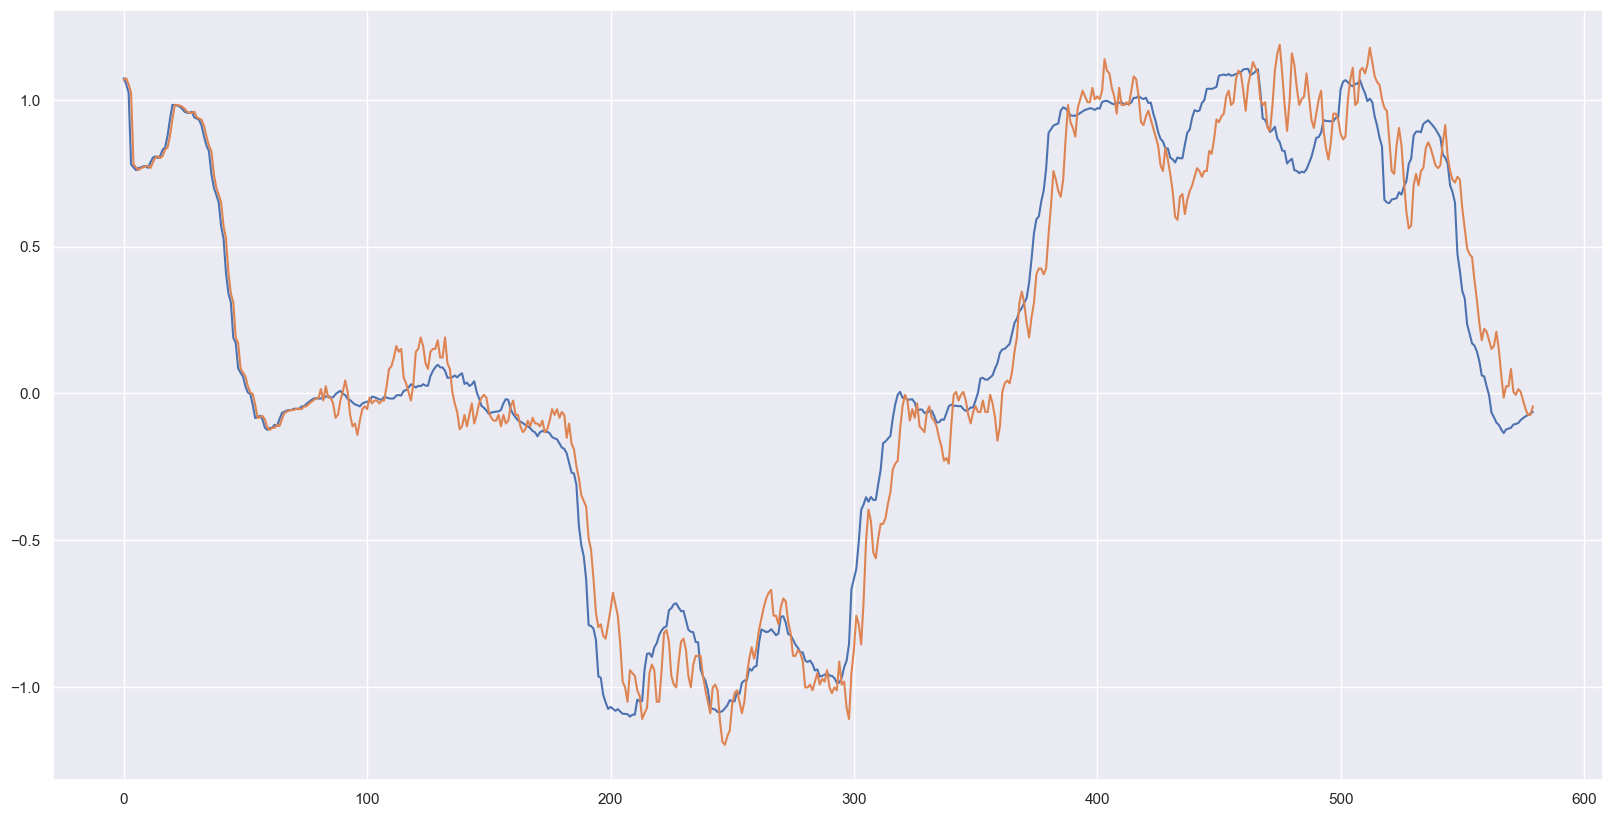

In [78]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# make plot bigger
plt.figure(figsize=(20, 10))
plt.plot(env.target_lataccel_history)
plt.plot(env.lataccel_history)
# stretch plot out
plt.show()

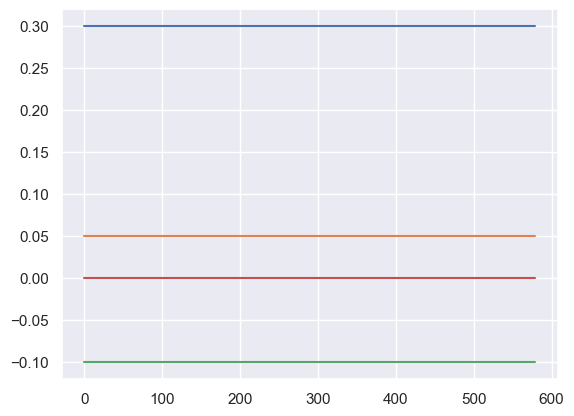

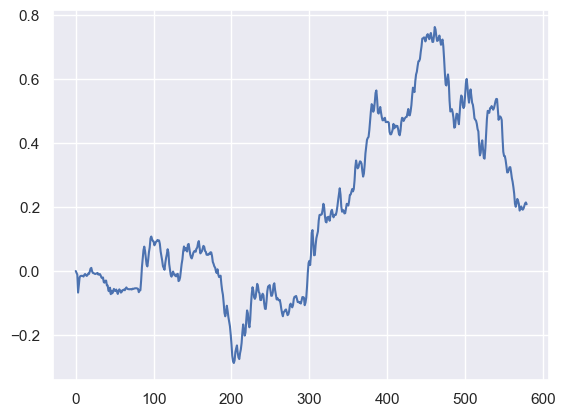

In [8]:
plt.plot(env.params_history)
plt.show()
plt.plot(env.output_history)

